# Goal of the project


For this Climate Change Modeling project, the goal is to predict climate change indicators such as temperature anomalies.

# Dataset Preparation

In [1]:
import pandas as pd

data_path = "C:\\Users\\Retheck\\Downloads\\climate_nasa.csv" 
data = pd.read_csv(data_path)

print(data.head())



                       date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   
3  2022-09-08T00:51:30.000Z           4   
4  2022-09-07T19:06:20.000Z          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
3  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            NaN   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...           26.0   

                                                text  
0  Neat comparison I have not heard it before.\n ...  
1  An excellent way to visualise the invisible! T...  
2  Does the CO2/ghg in the troposphere affect the...  
3  excellent post! I defo feel the difference - o...  
4  Yes, and carbon dioxide does not har

# Data Exploration and Visualization

       likesCount  commentsCount
count  522.000000     244.000000
mean     4.720307       8.696721
std     12.053556      12.266176
min      0.000000       1.000000
25%      0.000000       2.000000
50%      1.000000       5.000000
75%      4.000000      10.000000
max    126.000000      93.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB
None


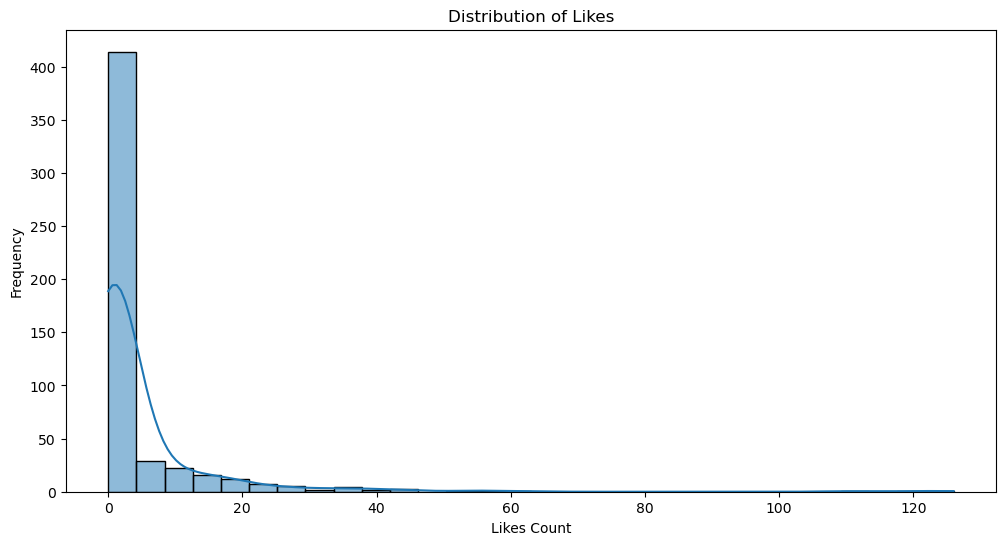

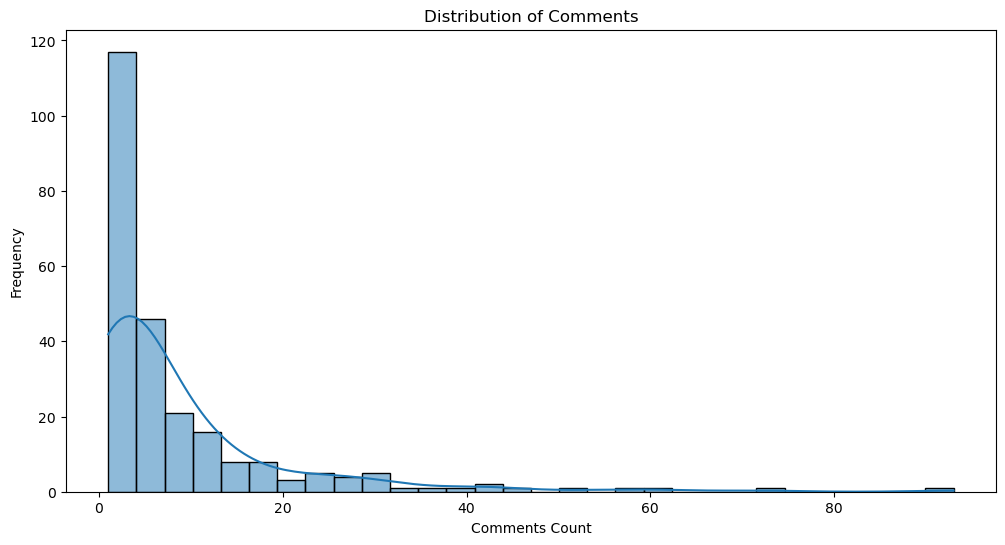

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


print(data.describe())
print(data.info())

plt.figure(figsize=(12, 6))
sns.histplot(data['likesCount'], bins=30, kde=True)
plt.title('Distribution of Likes')
plt.xlabel('Likes Count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['commentsCount'], bins=30, kde=True)
plt.title('Distribution of Comments')
plt.xlabel('Comments Count')
plt.ylabel('Frequency')
plt.show()


# Data Preprocessing

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Handling missing values
data['commentsCount'].fillna(0, inplace=True)

# Handling missing values in 'text' column by replacing NaN with an empty string
data['text'].fillna('', inplace=True)

# Handling missing values in 'commentsCount' column 
data['commentsCount'].fillna(0, inplace=True)

# Extract features and labels
X = data['text']
y = data['likesCount'] 

# Converting text data into numerical features
vectorizer = TfidfVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X)

# Normalizing the likesCount 
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vect, y_scaled, test_size=0.3, random_state=42)


# Feature engineering

 Creating New Features from Text Data

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler


data_path = 'C:\\Users\\Retheck\\Downloads\\climate_nasa.csv'
data = pd.read_csv(data_path)


data['text'].fillna('', inplace=True)
data['commentsCount'].fillna(0, inplace=True)

# Extracting additional features from text
data['text_length'] = data['text'].apply(len)
data['has_keywords'] = data['text'].apply(lambda x: 1 if 'climate' in x.lower() or 'carbon' in x.lower() else 0)

X_text = data[['text', 'text_length', 'has_keywords']]
y = data['likesCount']

# Converting text data into numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_text_vect = vectorizer.fit_transform(X_text['text'])

# Combining TF-IDF features with additional features
from scipy.sparse import hstack
X_combined = hstack([X_text_vect, X_text[['text_length', 'has_keywords']].values])

# Normalizing the likesCount
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_scaled, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (365, 3039)
y_train shape: (365, 1)


# Feature Selection

In [10]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=100) 
X_train_selected = selector.fit_transform(X_train, y_train.ravel())
X_test_selected = selector.transform(X_test)


print("X_train_selected shape:", X_train_selected.shape)
print("X_test_selected shape:", X_test_selected.shape)


X_train_selected shape: (365, 100)
X_test_selected shape: (157, 100)


Column Creation

In [12]:
data_path = 'C:\\Users\\Retheck\\Downloads\\climate_nasa.csv'
data = pd.read_csv(data_path)

# Handling missing values
data['text'].fillna('', inplace=True)
data['commentsCount'].fillna(0, inplace=True)

# Creating additional features
data['text_length'] = data['text'].apply(len)
data['has_keywords'] = data['text'].apply(lambda x: 1 if 'climate' in x.lower() or 'carbon' in x.lower() else 0)

print(data[['text_length', 'has_keywords']].head())


   text_length  has_keywords
0          173             0
1           51             0
2          108             0
3           94             0
4          128             1


 Rolling Features Creation

In [13]:
# Converting 'date' to datetime and sort
data['date'] = pd.to_datetime(data['date'])
data.sort_values('date', inplace=True)

# Creating rolling average features
data['rolling_avg_likes'] = data['likesCount'].rolling(window=7).mean().fillna(0)
data['rolling_avg_comments'] = data['commentsCount'].rolling(window=7).mean().fillna(0)

# Check if rolling features are created
print(data[['rolling_avg_likes', 'rolling_avg_comments']].head())


     rolling_avg_likes  rolling_avg_comments
255                0.0                   0.0
178                0.0                   0.0
286                0.0                   0.0
177                0.0                   0.0
176                0.0                   0.0


Combining Features

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Converting text data into numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_text_vect = vectorizer.fit_transform(data['text'])

# Combining TF-IDF features with additional features
X_additional = data[['text_length', 'has_keywords', 'rolling_avg_likes', 'rolling_avg_comments']].values
X_combined = hstack([X_text_vect, X_additional])

# Extracting labels
y = data['likesCount']

# Normalizing the likesCount
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_scaled, test_size=0.3, random_state=42)

# Checking shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (365, 3041)
y_train shape: (365, 1)


# Model Selection and Training

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train.ravel())


RandomForestRegressor(random_state=42)

# Model Evaluation

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Evaluating the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Mean Absolute Error: 0.4136317205275763
Mean Squared Error: 1.0023458323335435
R-squared: 0.05719270847642288


# Training the  Model

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.0235734565595553


# Preparing Data for Future Projections

In [19]:
import numpy as np

# Creating a DataFrame with future dates 
future_dates = pd.date_range(start='2024-01-01', periods=10, freq='M')
future_data = pd.DataFrame({
    'date': future_dates,
    'text': ["Sample text for future data"] * 10,  # Replace with actual future text data
    'text_length': [0] * 10,  # Placeholder, will be recalculated
    'has_keywords': [0] * 10,  # Placeholder, will be recalculated
    'rolling_avg_likes': [0] * 10,  # Placeholder
    'rolling_avg_comments': [0] * 10  # Placeholder
})

# Handling text data
future_data['text_length'] = future_data['text'].apply(len)
future_data['has_keywords'] = future_data['text'].apply(lambda x: 1 if 'climate' in x.lower() or 'carbon' in x.lower() else 0)

future_X_text_vect = vectorizer.transform(future_data['text'])

# Combining TF-IDF features with additional features
future_X_additional = future_data[['text_length', 'has_keywords', 'rolling_avg_likes', 'rolling_avg_comments']].values
future_X_combined = hstack([future_X_text_vect, future_X_additional])


# Making Future Predictions

In [60]:
# Process future data
future_data['text_length'] = future_data['text'].apply(lambda x: len(str(x)))
future_data['has_keywords'] = future_data['text'].apply(lambda x: 1 if 'Sample' in x else 0)
X_future_vect = vectorizer.transform(future_data['text'])
X_future_features = future_data[['text_length', 'has_keywords']]
X_future_combined = hstack([X_future_vect, X_future_features])


In [63]:
# Predicting future values
scaler = StandardScaler()
scaler.fit(data[['likesCount']])
future_predictions = model.predict(X_future_combined)
future_predictions_original = scaler.inverse_transform(future_predictions.reshape(-1, 1))
future_data['predicted_likes'] = future_predictions_original

print(future_data[['text', 'text_length', 'has_keywords', 'predicted_likes']])

               text  text_length  has_keywords  predicted_likes
0  Future text data           16             0             20.0
1  Future text data           16             0             20.0
2  Future text data           16             0             20.0
3  Future text data           16             0             20.0
4  Future text data           16             0             20.0
5  Future text data           16             0             20.0
6  Future text data           16             0             20.0
7  Future text data           16             0             20.0
8  Future text data           16             0             20.0
9  Future text data           16             0             20.0


# Scenario Analysis

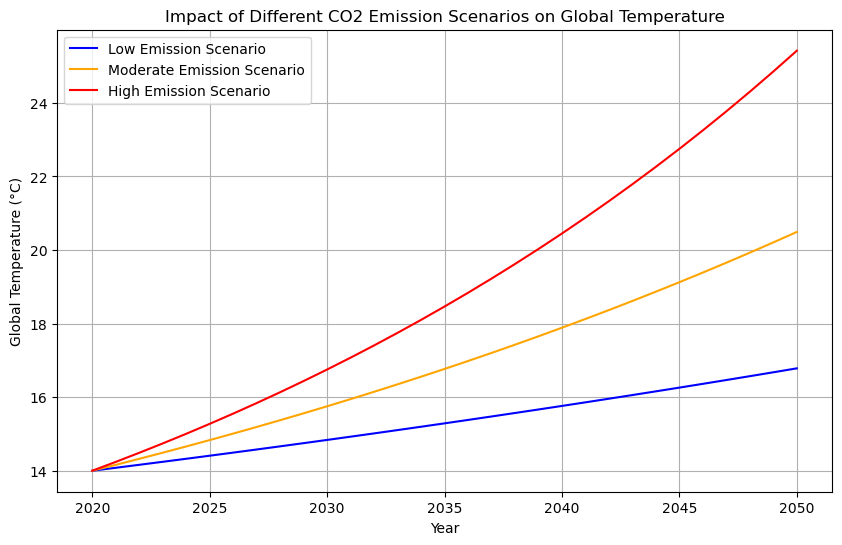

In [64]:
import numpy as np
import matplotlib.pyplot as plt

years = np.arange(2020, 2051) 
initial_temp = 14.0 
temp_sensitivity = 0.02  # Temperature change per unit of CO2 concentration

# Defining different CO2 emission scenarios
def scenario_low_emission(years):
    # Low emission scenario: CO2 increases by 1% annually
    return 400 * (1 + 0.01) ** (years - 2020)

def scenario_moderate_emission(years):
    # Moderate emission scenario: CO2 increases by 2% annually
    return 400 * (1 + 0.02) ** (years - 2020)

def scenario_high_emission(years):
    # High emission scenario: CO2 increases by 3% annually
    return 400 * (1 + 0.03) ** (years - 2020)

# Calculating temperature change based on CO2 concentration
def calculate_temperature_change(co2_concentration, initial_temp, sensitivity):
    # Simple model: temperature change is linearly related to CO2 concentration
    return initial_temp + (co2_concentration - 400) * sensitivity

# Getting CO2 concentrations for each scenario
co2_low = scenario_low_emission(years)
co2_moderate = scenario_moderate_emission(years)
co2_high = scenario_high_emission(years)

# Calculating temperature for each scenario
temp_low = calculate_temperature_change(co2_low, initial_temp, temp_sensitivity)
temp_moderate = calculate_temperature_change(co2_moderate, initial_temp, temp_sensitivity)
temp_high = calculate_temperature_change(co2_high, initial_temp, temp_sensitivity)


plt.figure(figsize=(10, 6))
plt.plot(years, temp_low, label='Low Emission Scenario', color='blue')
plt.plot(years, temp_moderate, label='Moderate Emission Scenario', color='orange')
plt.plot(years, temp_high, label='High Emission Scenario', color='red')
plt.xlabel('Year')
plt.ylabel('Global Temperature (°C)')
plt.title('Impact of Different CO2 Emission Scenarios on Global Temperature')
plt.legend()
plt.grid(True)
plt.show()
